# Proje Konusu

Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.

Buna yönelik olarak müşterilerin davranışlarını tanımlayacağız ve bu davranışlarda öbeklenmelere göre gruplar oluşturacağız.

Yani ortak davranışlar sergileyenleri aynı gruplara alacağız ve bu gruplara özel satış ve pazarlama teknikleri geliştirmeye çalışacağız.

# Veri Seti Hikayesi

"Online Retail II" isimli veri seti İngiltere merkezli online bir satış mağazasının 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor. Bu şirket hediyelik eşya satıyor, bu ürünler promosyon ürünleri gibi düşünebilir. Firmanın müşterilerinin çoğu toptancıdır.

# Değişkenler

InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. Eğer bu kod C ile başlıyorsa işlemin iptal edildiğini ifade eder.

StockCode: Ürün kodu. Her bir ürün için eşsiz numara.

Description: Ürün ismi

Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.

InvoiceDate: Fatura tarihi ve zamanı.

UnitPrice: Ürün fiyatı (Sterlin cinsinden)

CustomerID: Eşsiz müşteri numarası

Country: Ülke ismi. Müşterinin yaşadığı ülke.

In [28]:
# Bu projede;RFM Değerlerini bulacağım ve bu değerler üzerinden K-Means Clustering algoritmasını kullanarak kümeleme işlemleri yapacağım.

# RFM; Recency, Frequency, Monetary ifadelerinin ilk harflarinden oluşur. Müşterilerin satın alma alışkanlıkları üzerinden pazarlama ve satış stratejileri belirlemeye yardımcı olan bir tekniktir.

# Recency: müşteri en son ne zaman satın almış

# Frequency: müşteri toplam kaç adet ürün almış

# Monetary: Müşteri toplam ne kadar harcama yapmış

# K-Means Clustering

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
dataset = pd.read_csv('online_retail_II.csv', delimiter=",",encoding="latin1")
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [31]:
dataset.shape

(1067371, 8)

In [32]:
# sadece ingiltereye ait verileri alıyorum

dataset = dataset.query("Country == 'United Kingdom'").reset_index(drop=True)
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [33]:
# eksik değerleri kontrol edeceğim

dataset.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    240029
Country             0
dtype: int64

In [34]:
# eksik değerleri sileceğim

dataset= dataset.dropna()
dataset.shape

(741301, 8)

In [35]:
# RFM değerlerini bulabilmek için;tarihi ve toplam fiyatı bulmam lazım

dataset["TotalPrice"] = dataset["Price"]*dataset["Quantity"]
dataset.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [36]:
# değerlendirmenin daha kolay yapılabilmesi için bugünün tarihini 1 Ocak 2012 olarak alıyorum.  
today = pd.Timestamp(2012,1,1) 
today

Timestamp('2012-01-01 00:00:00')

In [37]:
# tarih verisi üzerinden işlem yapacağımdan dolayı;
# InvoiceDate sutununu datetime tipine çeviriyorum
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [38]:
# olası iade ve iptal işlemlerini filtrelemek istiyorum
dataset = dataset[(dataset['Quantity'] > 0) & (dataset['TotalPrice'] > 0)]

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725250 entries, 0 to 981329
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      725250 non-null  object        
 1   StockCode    725250 non-null  object        
 2   Description  725250 non-null  object        
 3   Quantity     725250 non-null  int64         
 4   InvoiceDate  725250 non-null  datetime64[ns]
 5   Price        725250 non-null  float64       
 6   Customer ID  725250 non-null  float64       
 7   Country      725250 non-null  object        
 8   TotalPrice   725250 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 55.3+ MB


In [40]:
# Recency ve Monetary değerlerinin bulunması;
# müşterilerin yapmış oldukları toplam harcamaları bulacağım bunun için yukarıda oluşturmuş olduğum totalPrice sutununu kullanacağım
# ayrıca bir de müşteriler en son ne zaman alış veriş yapmışlar onu bulacağım

def calculate_total_price(x):
    return x.sum()

def calculate_days_since_last_purchase(x):
    return (today - x.max()).days

df = dataset.groupby('Customer ID').agg(
    Monetary=('TotalPrice', calculate_total_price),
    Recency=('InvoiceDate', calculate_days_since_last_purchase)
)
df.head()


,Monetary,Recency
Customer ID,,
12346.0,77556.46,347
12608.0,415.79,426
12745.0,723.85,508
12746.0,254.55,562
12747.0,9276.54,24


In [41]:
# Müşteri başına toplam satın alma sayısını hesapla

df2 = dataset.groupby('Customer ID').agg(Frequency=('Invoice', 'nunique'))
df2.head()

,Frequency
Customer ID,
12346.0,12
12608.0,1
12745.0,2
12746.0,1
12747.0,26


In [42]:
df = pd.concat([df,df2],axis=1)
df.head()

,Monetary,Recency,Frequency
Customer ID,,,
12346.0,77556.46,347,12
12608.0,415.79,426,1
12745.0,723.85,508,2
12746.0,254.55,562,1
12747.0,9276.54,24,26


In [43]:
from sklearn.preprocessing import  MinMaxScaler

df_scaled = df.copy()
for i in ["Monetary","Recency","Frequency"]:
    mms = MinMaxScaler()
    df_scaled[i] = mms.fit_transform(df_scaled[[i]])
df_scaled.head()

,Monetary,Recency,Frequency
Customer ID,,,
12346.0,0.127384,0.440379,0.032836
12608.0,0.000678,0.547425,0.000000
12745.0,0.001184,0.658537,0.002985
12746.0,0.000413,0.731707,0.000000
12747.0,0.015232,0.002710,0.074627


In [44]:
X = df_scaled.iloc[:, :].values

# k değerinin bulunması

## 1 - **Elbow** Yöntemi

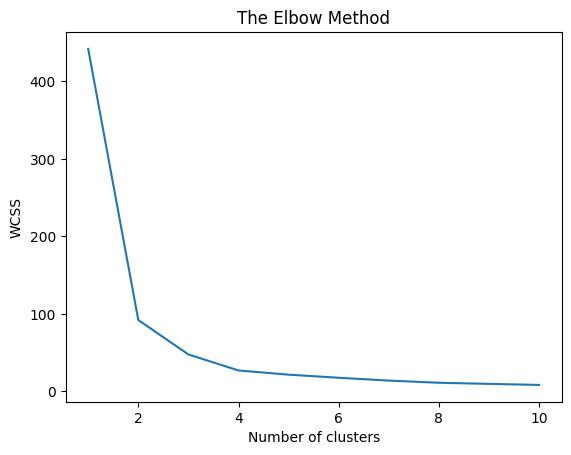

In [45]:
from sklearn.cluster import KMeans

# Kırılma noktasına göre "k" seçimi yapılır

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 2 -**Silhouette Score** 

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette skorunun en büyük olduğu değeri "k" noktası olarak seçilebilir, çünkü bu noktada kümeleme performansı en yüksektir.
# Farklı küme sayıları için Silhouette Score'u hesapla
for n_clusters in range(2, 10):
    kmeans =  KMeans(n_clusters = n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Küme Sayısı = {n_clusters}, Silhouette Score = {silhouette_avg}")

Küme Sayısı = 2, Silhouette Score = 0.7151020261564529
Küme Sayısı = 3, Silhouette Score = 0.6745690239595848
Küme Sayısı = 4, Silhouette Score = 0.6533215103243308
Küme Sayısı = 5, Silhouette Score = 0.5804736617031121
Küme Sayısı = 6, Silhouette Score = 0.5599904259621002
Küme Sayısı = 7, Silhouette Score = 0.5850905657747727
Küme Sayısı = 8, Silhouette Score = 0.5232173807224999
Küme Sayısı = 9, Silhouette Score = 0.5140267848622995


## 3 -**Dendrogram** Yöntemi

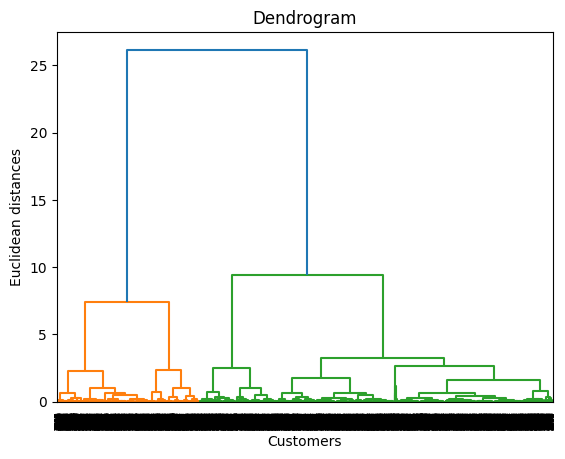

In [47]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [48]:
# K-Means Clustering

kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init=10)
y_pred = kmeans.fit_predict(X)

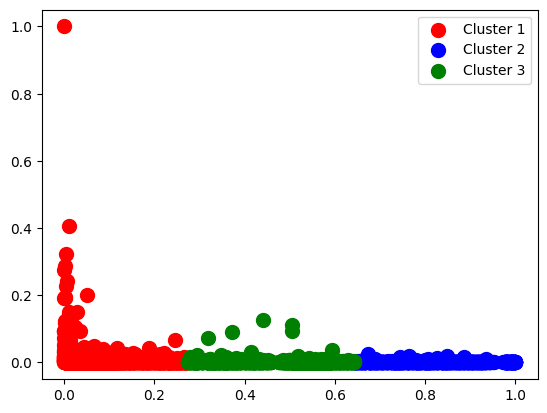

In [49]:
plt.scatter(X[y_pred == 0, 1], X[y_pred == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 1], X[y_pred == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('')
# plt.xlabel('')
# plt.ylabel('')
plt.legend()
plt.show()

In [50]:
df["Cluster"] = y_pred
df.head()

,Monetary,Recency,Frequency,Cluster
Customer ID,,,,
12346.0,77556.46,347,12,2
12608.0,415.79,426,1,2
12745.0,723.85,508,2,1
12746.0,254.55,562,1,1
12747.0,9276.54,24,26,0


In [51]:
df.groupby("Cluster").mean()

,Monetary,Recency,Frequency
Cluster,,,
0,3920.581181,75.624885,8.661355
1,558.542582,621.249649,1.698457
2,1115.029303,372.348617,2.960699


In [ ]:
# kümelere göre gruplama yapıp RFM değerlerinin ortalamasına bakıldığı zaman;
# en çok harcama yapan: Cluster = 0
# en sık ürün satın alan: Cluster = 0
# en çok ürün satın alan: Cluster = 0